# 3. 神经网络入门

## 3.4. 电影评论分类：二分类问题

二分类问题可能是应用最广泛的机器学习问题。在这个例子中，你将学习根据电影评论的文字内容将其划分为正面或负面。

In [1]:
# 加载IMDB数据集
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2024-08-28 00:37:07.771705: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 00:37:08.274142: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 00:37:08.494521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 00:37:08.787904: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 00:37:08.883190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 00:37:09.465654: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# 浏览一下数据
len(train_data[0])  # 218
train_data[0][:10]  # [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

# 翻译一下评论
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [3]:
# 准备数据
# 对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列[3, 5]将会被转换为10 000维向量，只有索引为3和5的元素是1，其余元素都是0。然后网络第一层可以用Dense层，它能够处理浮点数向量数据。
# 将整数序列编码为二进制矩阵

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))   # 创建一个形状为(len(sequences), dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                     # 将results[i]的指定索引设为1
    return results

x_train = vectorize_sequences(train_data)             # 将训练数据向量化
x_test = vectorize_sequences(test_data)               # 将测试数据向量化

y_train = np.asarray(train_labels).astype('float32')  # 将训练标签向量化
y_test = np.asarray(test_labels).astype('float32')    # 将测试标签向量化

In [4]:
# 构建网络
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/root/GithubProjects/HelloAI/Book/Python深度学习/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 编译模型
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [6]:
# 训练模型
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2024-08-28 00:37:21.765230: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6490 - loss: 0.6352

2024-08-28 00:37:23.642229: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.6800 - loss: 0.6113 - val_acc: 0.8683 - val_loss: 0.4125
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8923 - loss: 0.3597 - val_acc: 0.8835 - val_loss: 0.3254
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9137 - loss: 0.2669 - val_acc: 0.8750 - val_loss: 0.3100
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9289 - loss: 0.2141 - val_acc: 0.8811 - val_loss: 0.2925
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9433 - loss: 0.1747 - val_acc: 0.8654 - val_loss: 0.3326
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9523 - loss: 0.1507 - val_acc: 0.8803 - val_loss: 0.3023
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9608 - loss: 0.1304 - val_acc: 0.8808 - val_loss: 0.3020
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.9654 - loss: 0.1145 - val_acc: 0.8749 - val_loss: 0.3248
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9770 - loss: 0.

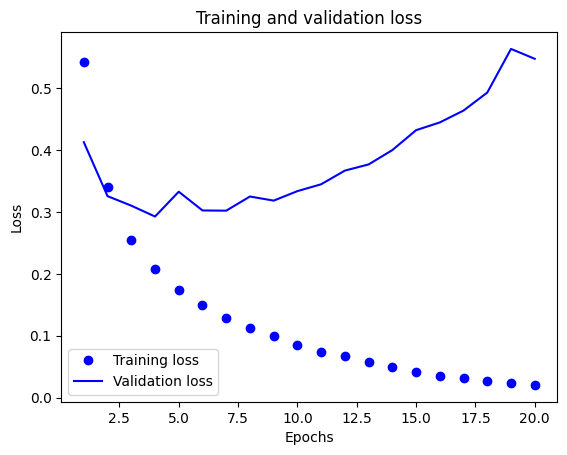

In [7]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

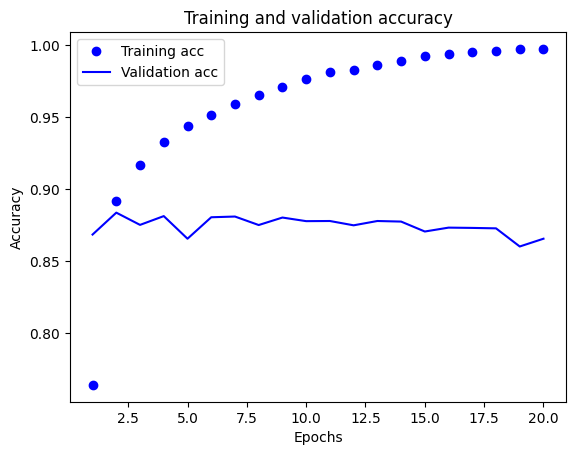

In [8]:
# 绘制训练精度和验证精度
plt.clf()  # 清空图像
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()